# Decision Tree Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import pandas_datareader
from sklearn.metrics import r2_score

C:\Program Files\Anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.1.0' currently installed).
  warnings.warn(msg, UserWarning)
C:\Program Files\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


## Importing the dataset

In [2]:
start_date = '2015-06-12'
end_date = '2020-06-12'

In [3]:
data = pandas_datareader.data.get_data_yahoo('^NSEI', start_date, end_date)
data.shape

(1225, 6)

In [4]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.998099,0.998982,0.999108,0.187268,0.999108
Low,0.998099,1.000000,0.998976,0.998850,0.154963,0.998850
Open,0.998982,0.998976,1.000000,0.998107,0.172718,0.998107
Close,0.999108,0.998850,0.998107,1.000000,0.170811,1.000000
Volume,0.187268,0.154963,0.172718,0.170811,1.000000,0.170811
Adj Close,0.999108,0.998850,0.998107,1.000000,0.170811,1.000000


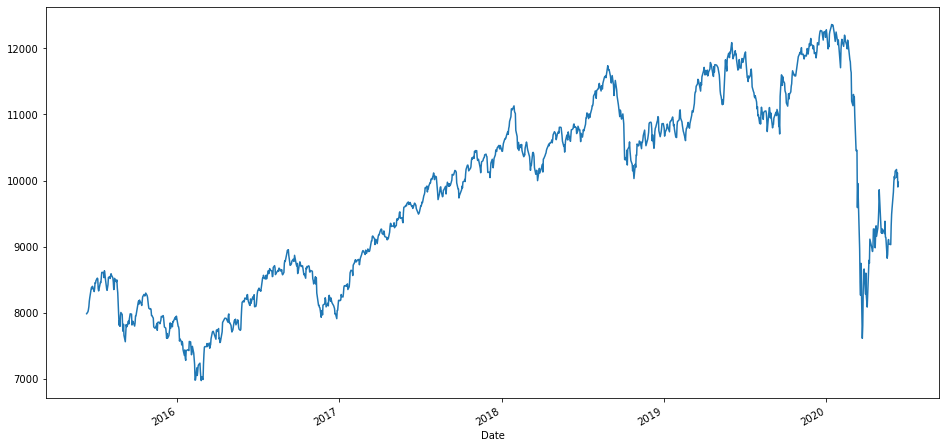

In [5]:
plt.figure(figsize=(16,8))
data['Close'].plot()
plt.show()

In [6]:
n=30
X = pd.DataFrame(index=data[['Adj Close']][0:n].index.copy())
for i in range(data.shape[0]-n):
    X[f'{i}'] = np.array(data['Adj Close'][i:n+i].values)
X = X.transpose()
X.index=data.tail(X.shape[0]).index
X = pd.concat([X,data[['Adj Close']].tail(X.shape[0])],axis = 1, sort = False)
X.drop(['Adj Close'],axis=1,inplace=True)

rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

In [7]:
y = data[['Adj Close']].tail(X.shape[0])
y=y.rename(columns={'Adj Close': 'Close'})

## Splitting the dataset into the Training set and Test set

In [8]:
d = 40
X_train = X.head(X.shape[0]-d)
y_train = y.head(X.shape[0]-d)
X_test = X.tail(d) 
y_test = y.tail(d)

## Training the Multiple Linear Regression model on the Training set

In [9]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion = 'mae',max_depth = 9,min_samples_split = 28,
                                  max_leaf_nodes=46,min_samples_leaf=13, random_state = 0)
regressor.fit(X_train, y_train)
r2_score(y_test, regressor.predict(X_test))

0.7938661183984248

## Predicting the Test set results

In [10]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[ 8925.3   8992.8 ]
 [ 8925.3   9266.75]
 [ 9181.45  9261.85]
 [ 9181.45  8981.45]
 [ 8925.3   9187.3 ]
 [ 9181.45  9313.9 ]
 [ 9422.4   9154.4 ]
 [ 9181.45  9282.3 ]
 [ 9422.4   9380.9 ]
 [ 9422.4   9553.35]
 [ 9422.4   9859.9 ]
 [ 9633.6   9293.5 ]
 [ 9422.4   9205.6 ]
 [ 9181.45  9270.9 ]
 [ 9181.45  9199.05]
 [ 9181.45  9251.5 ]
 [ 9181.45  9239.2 ]
 [ 9181.45  9196.55]
 [ 9181.45  9383.55]
 [ 9422.4   9142.75]
 [ 9181.45  9136.85]
 [ 9105.15  8823.25]
 [ 8777.58  8879.1 ]
 [ 8925.3   9066.55]
 [ 9105.15  9106.25]
 [ 9105.15  9039.25]
 [ 9105.15  9029.05]
 [ 9105.15  9314.95]
 [ 9422.4   9490.1 ]
 [ 9422.4   9580.3 ]
 [ 9633.6   9826.15]
 [ 9633.6   9979.1 ]
 [ 9914.9  10061.55]
 [10079.3  10029.1 ]
 [10079.3  10142.15]
 [10079.3  10167.45]
 [10079.3  10046.65]
 [10079.3  10116.15]
 [10079.3   9902.  ]
 [ 9914.9   9972.9 ]]


regressor.predict([[86.95,90.95,90,88.25]])

## Visualising the Training set results

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


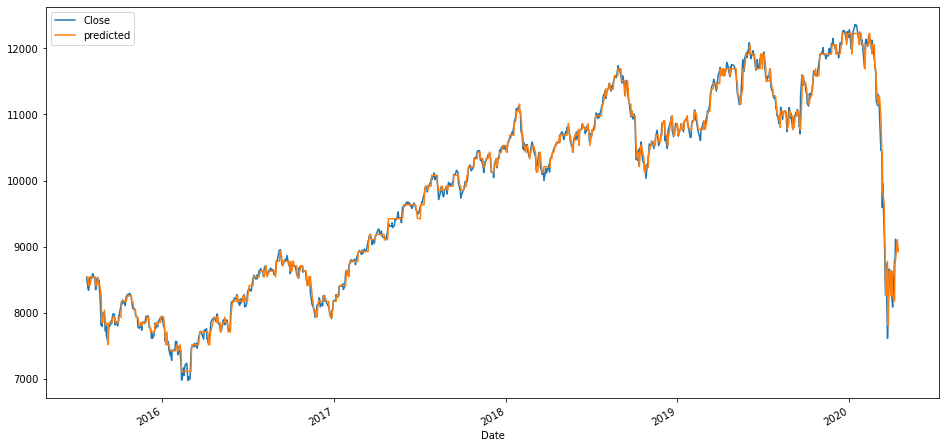

In [11]:
y_plt = y_train[:]
y_plt['predicted'] = np.array(regressor.predict(X_train))
plt.figure(figsize=(16,8))
y_train['Close'].plot()
y_plt['predicted'].plot()
plt.legend()

## Visualising the Test set results

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


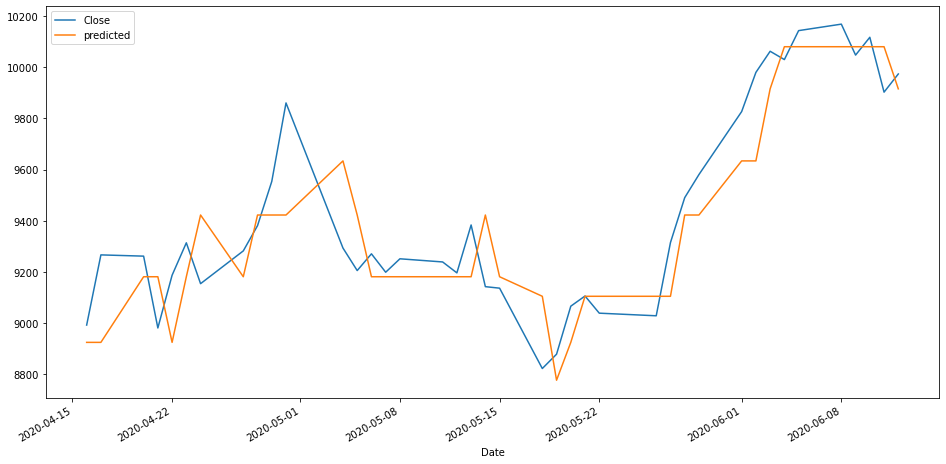

In [12]:
y_plt2 = y_test[:]
y_plt2['predicted'] = np.array(regressor.predict(X_test))
plt.figure(figsize=(16,8))
y_test['Close'].plot()
y_plt2['predicted'].plot()
plt.legend()

## Visualising the Future set results

In [13]:
y_future = y_test[:].rename(columns={'Close': 'Future'})
for i in range(n+1,d):
    y_future['Future'][i] = regressor.predict([y_future.iloc[i-n-1:i-1,0]])

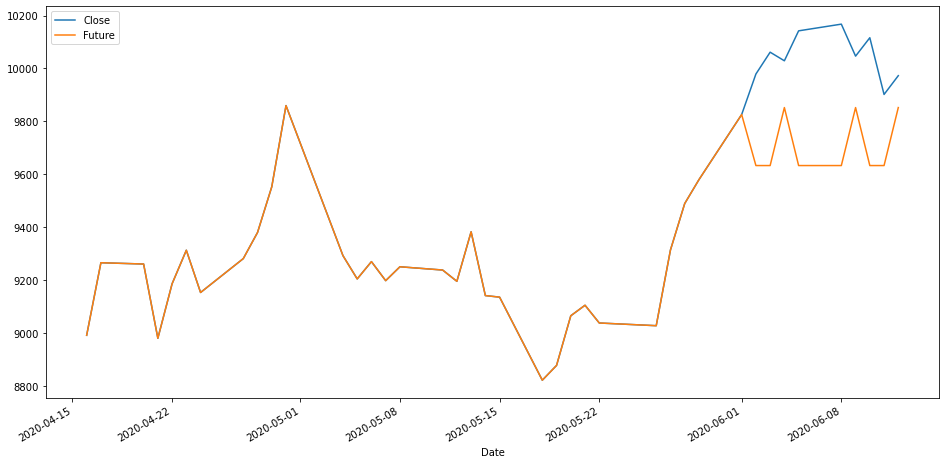

In [14]:
plt.figure(figsize=(16,8))
y_test['Close'].plot()
y_future['Future'].plot()
plt.legend()

In [15]:
from sklearn.metrics import r2_score
r2_score(y_test.tail(d-n).values, y_future.tail(d-n).values)

-10.91131885008093